## Доля взрослых, имеющих ожирение

### Карта ожирения

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.offline
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegFileWriter
from IPython.display import HTML

In [2]:
import matplotlib.cbook as cbook

In [3]:
url = 'https://drive.google.com/file/d/1kOEFG86xb_hEO7LkOGtax7B5zFPwyZDX/view?usp=sharing'
url_2 = 'https://drive.google.com/uc?id=' + url.split('/')[-2]

In [4]:
df = pd.read_csv(url_2, parse_dates=[0])

In [5]:
df.head()

Entity Code  Year  Prevalence of obesity (both sexes) - WHO (2019)
0  Afghanistan  AFG  1975                                              0.5
1  Afghanistan  AFG  1976                                              0.5
2  Afghanistan  AFG  1977                                              0.6
3  Afghanistan  AFG  1978                                              0.6
4  Afghanistan  AFG  1979                                              0.6

In [6]:
df['Prevalence of obesity (both sexes) - WHO (2019)'].describe()

count    8316.000000
mean       12.365115
std         9.780486
min         0.100000
25%         4.500000
50%        10.800000
75%        17.825000
max        61.000000
Name: Prevalence of obesity (both sexes) - WHO (2019), dtype: float64

In [7]:
fig = px.choropleth(
    df,   #загружаем датафрейм
    locations = 'Code',    #отмечаем локации
    color = 'Prevalence of obesity (both sexes) - WHO (2019)',  #фиксируем столбец, по которому будем красить карту
    hover_name = 'Entity',   # фиксируем "парящее названиие страны"
    animation_frame = 'Year',    # обозначаем столбец с датой
    color_continuous_scale = 'RdYlGn_r',
    projection = 'equirectangular',  #форма карты
    range_color = [0, 30],    #разбег значений, по которому будет масштабироваться шкала
    color_continuous_midpoint = 60,
    title='<span style="font-size:32px; font-family:Times New Roman">Доля взрослых, страдающих ожирением</span>'
)
fig.show()
plotly.offline.plot(fig, filename=r'C:\Users\emo.DESKTOP-NBUNK0A\Documents\Data science\Datasets\file.html')

'C:\\Users\\emo.DESKTOP-NBUNK0A\\Documents\\Data science\\Datasets\\file.html'

### График изменения доли ожирения

In [8]:
df_renew = df.pivot_table(index='Year', columns='Entity', values='Prevalence of obesity (both sexes) - WHO (2019)').reset_index()
df_renew.head()

Entity  Year  Afghanistan  Africa  Albania  Algeria  Americas  Andorra  \
0       1975          0.5     2.0      6.5      6.9       9.5     12.9   
1       1976          0.5     2.1      6.7      7.2       9.8     13.5   
2       1977          0.6     2.2      6.8      7.4      10.1     14.0   
3       1978          0.6     2.3      7.0      7.7      10.5     14.5   
4       1979          0.6     2.3      7.2      8.0      10.8     15.0   

Entity  Angola  Antigua and Barbuda  Argentina  ...  United States  Uruguay  \
0          0.8                  5.6       11.2  ...           11.9     11.4   
1          0.9                  5.8       11.5  ...           12.2     11.7   
2          0.9                  6.0       11.8  ...           12.6     11.9   
3          1.0                  6.2       12.1  ...           13.0     12.2   
4          1.1                  6.4       12.5  ...           13.3     12.5   

Entity  Uzbekistan  Vanuatu  Venezuela  Vietnam  Western Pacific  Yemen  \
0              4.4      5.6        9.6      0.1              0.8    2.8   
1              4.6      5.8        9.9      0.1              0.8    2.9   
2              4.8      6.1       10.3      0.2              0.8    3.1   
3              5.0      6.3       10.7      0.2              0.9    3.3   
4              5.2      6.6       11.0      0.2              0.9    3.4   

Entity  Zambia  Zimbabwe  
0          1.5       3.7  
1          1.6       3.9  
2          1.7       4.0  
3          1.9       4.2  
4          2.0       4.4  

[5 rows x 199 columns]

In [9]:
kz_color = '#18B1FF'
ru_color = '#009900'
afg_color = '#FF9818'
usa_color = '#1823FF'
ch_color = '#FF1818'
sa_color = '#DA18FF'
lw = 2     # ширина линии
ms = 5    # размер маркера

In [10]:
# Задаим размеры шрифтов для подписей графиков
title_fs = 22
legend_fs = 10
axis_title_fs = 18
ticks_fs = 12

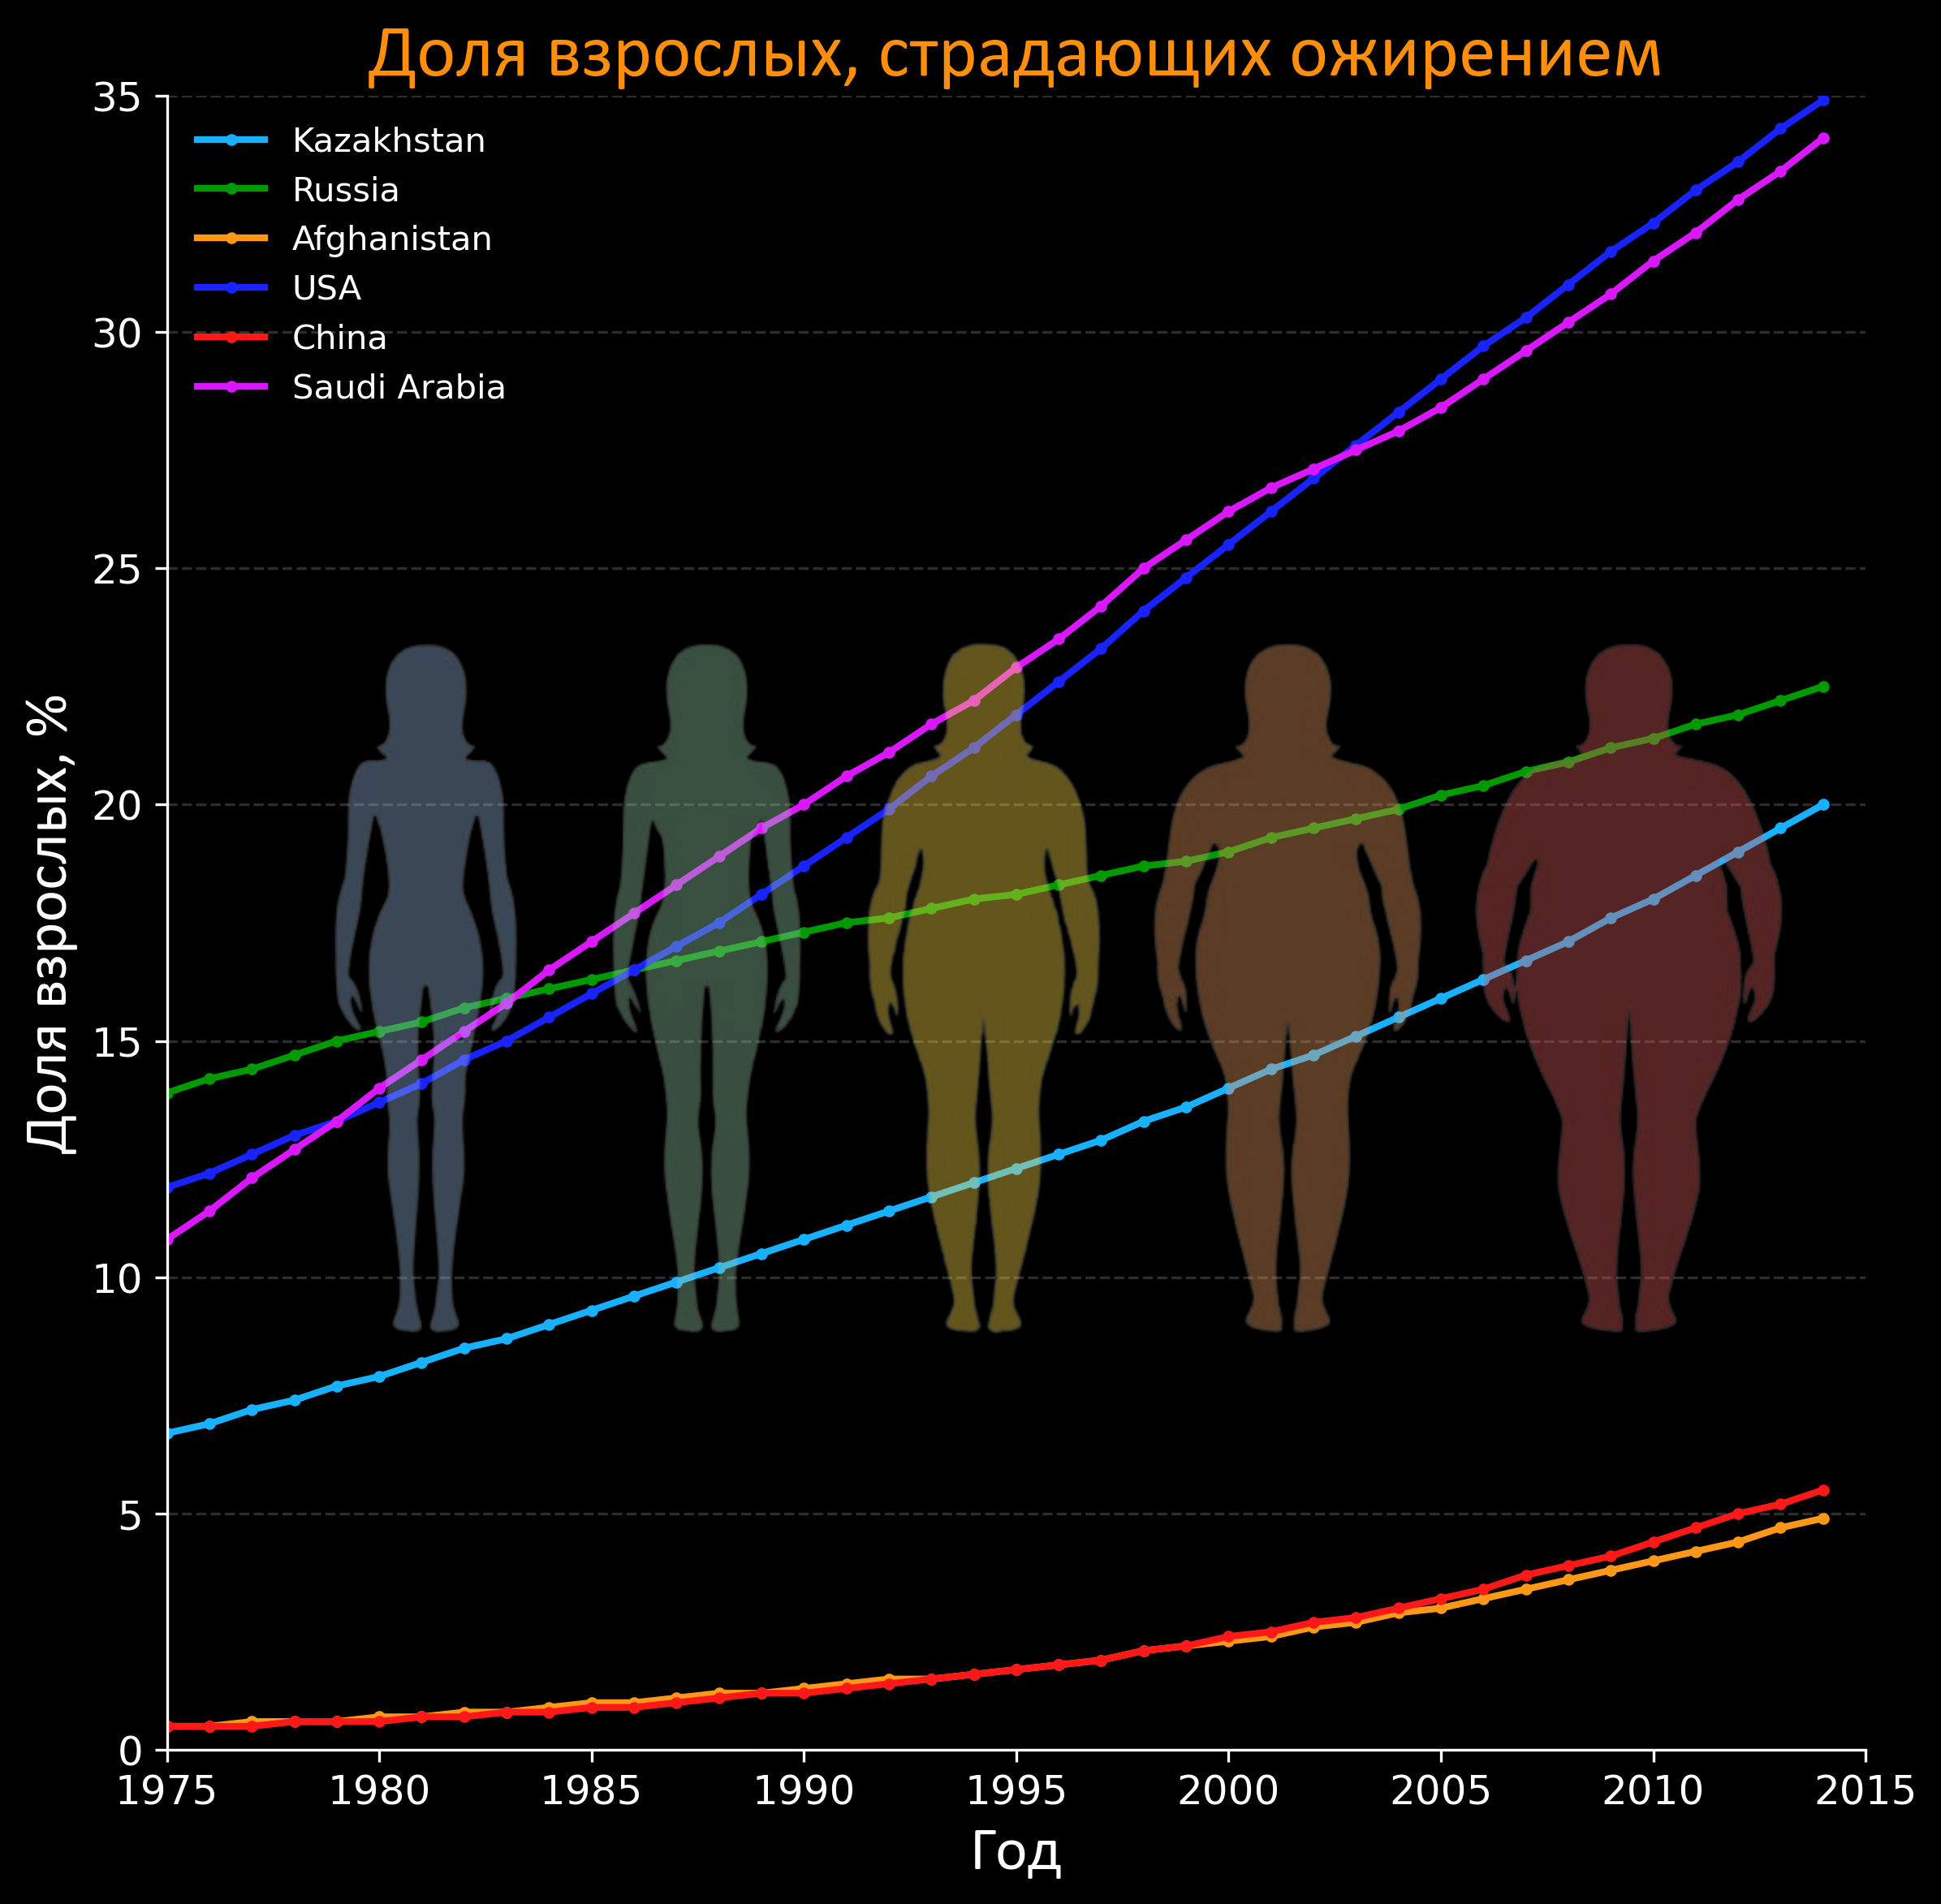

In [11]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(9,9), dpi=300) #dpi оставить если график сохраняется в видео, а если смотреть как jshtml dpi убрать
xdata, ydata_kz, ydata_ru, ydata_afg, ydata_usa, ydata_ch, ydata_sa = [], [], [], [], [], [], []
ln_kz, = plt.plot([], [], kz_color, animated=True, label='Kazakhstan', linewidth=lw, marker='.', markersize=ms)
ln_ru, = plt.plot([], [], ru_color, animated=True, label='Russia', linewidth=lw, marker='.', markersize=ms)
ln_afg, = plt.plot([], [], afg_color, animated=True, label='Afghanistan', linewidth=lw, marker='.', markersize=ms)
ln_usa, = plt.plot([], [], usa_color, animated=True, label='USA',linewidth=lw, marker='.', markersize=ms)
ln_ch, = plt.plot([], [], ch_color, animated=True, label='China', linewidth=lw, marker='.', markersize=ms)
ln_sa, = plt.plot([], [], sa_color, animated=True, label='Saudi Arabia', linewidth=lw, marker='.', markersize=ms)

f = range(0, 40, 1)


def init():
    ax.set_xlim(1975, 2015)
    ax.set_ylim(0, 35)
    ax.grid(which='major', axis='y', alpha=0.18, ls='--')
    ln_kz.set_data(xdata,ydata_kz)
    ln_ru.set_data(xdata,ydata_ru)
    ln_afg.set_data(xdata,ydata_afg)
    ln_usa.set_data(xdata,ydata_usa)
    ln_ch.set_data(xdata,ydata_ch)
    ln_sa.set_data(xdata,ydata_sa)
    ax.set_title(label='''Доля взрослых, страдающих ожирением''', fontsize=title_fs, fontname='Calibri', color='#FF8E0D')
    #ax.text(0.5, 0.35, 'A3', transform=ax.transAxes, fontsize=180, fontweight='bold', 
            #fontname='Calibri',color='#2041F8', alpha=0.09)
    
    # Добавка картинки
    fn = r'C:\Users\emo.DESKTOP-NBUNK0A\Documents\Data science\Datasets\картинки\last version.png'
    im = plt.imread(fn)
    ax.figure.figimage(im,
                   ax.bbox.xmax//3 - im.shape[0]//1.85,
                   ax.bbox.ymax//1.5 - im.shape[1]//2,
                   alpha=.4, zorder=1)
    
    ax.set_xlabel("Год",fontname='Calibri',loc='center', fontsize=axis_title_fs)
    ax.set_ylabel("Доля взрослых, %",fontname='Calibri',loc='center', fontsize=axis_title_fs)
    #ax.ticklabel_format(axis='y', scilimits=(6,6))
    plt.xticks(fontsize=ticks_fs)
    plt.yticks(fontsize=ticks_fs)
    
    for s in ['top', 'right']:
        ax.spines[s].set_visible(False)
        
    L = ax.legend(frameon=False,loc='upper left', ncol= 1, fontsize=legend_fs)
    L.get_frame().set_facecolor('none')
    return ln_kz, ln_ru, ln_afg, ln_usa, ln_ch, ln_sa

def update(frame):
    xdata.append(df_renew['Year'][frame])
    ydata_kz.append(df_renew['Kazakhstan'][frame])
    ydata_ru.append(df_renew['Russia'][frame])
    ydata_afg.append(df_renew['Afghanistan'][frame])
    ydata_usa.append(df_renew['United States'][frame])
    ydata_ch.append(df_renew['China'][frame])
    ydata_sa.append(df_renew['Saudi Arabia'][frame])
    ln_kz.set_data(xdata, ydata_kz)
    ln_ru.set_data(xdata, ydata_ru)
    ln_afg.set_data(xdata, ydata_afg)
    ln_usa.set_data(xdata, ydata_usa)
    ln_ch.set_data(xdata, ydata_ch)
    ln_sa.set_data(xdata, ydata_sa)
    return ln_ru, ln_kz, ln_afg, ln_usa, ln_ch, ln_sa

ani = FuncAnimation(fig, update, frames=f, init_func=init, blit=False, interval=750, repeat=False)

# Сохранить как mp4
ani.save(r'C:\Users\emo.DESKTOP-NBUNK0A\Documents\Data science\Datasets\Vizualizations\Obesity.mp4', writer='ffmpeg', fps=2, bitrate=10000)
#plt.show()
# Показать и сохранить как html
# HTML(ani.to_html5_video())
# Показать как jshtml
# HTML(ani.to_jshtml())
# Сохранить как gif
#ani.save(r'C:\Users\emo.DESKTOP-NBUNK0A\Documents\Data science\Epson dataset\Fabric_A3_0821.gif', writer='pillow', bitrate=10000)
#plt.savefig(r'C:\Users\emo.DESKTOP-NBUNK0A\Documents\Data science\Epson dataset\Fabric_A3_0821.jpg')